Data Science Fundamentals: Python |
[Table of Contents](../../index.ipynb)
- - - 
<!--NAVIGATION-->
Real World Examples: [Web Scraping](../web_scraping/01_rw_web_scraping.ipynb) | [Automation](../automation/02_rw_automation.ipynb) | [Messaging](../messaging/03_rw_messaging.ipynb) | [CSV](../csv/04_rw_csv.ipynb) | [Games](../games/05_games.ipynb) | [Mobile](../mobile/06_mobile.ipynb) | **[Computer Vision](./08_computer_vision.ipynb)** | [Chatbot](../chatbot/10_chatbot.ipynb) | [Built-In Database](../database/11_database.ipynb)
<br>
<br>
Optional: [Exploring Satellite Imagery in Python](./09_cv_satellite_imagery.ipynb)
- - -
Life Examples: [COVID-19](../COVID-19/COVID-19_visualizations-plotly.ipynb) | [Police Brutality](https://maminian.github.io/brutality-map/) | [Spanish Flu](../spanishflu/index.ipynb)

# Computer Vision Using OpenCV

[Matplotlib](https://matplotlib.org/) is an optional choice for displaying frames from video or images. We will show a couple of examples using it here. [Numpy](https://numpy.org/) is used for all things "numbers and Python." We are mainly making use of Numpy's array functionality. 

Finally, we are using the python-specific bindings for OpenCV called [python-OpenCV](https://pypi.org/project/opencv-python/).

There are some operations for OpenCV that you will not be able to do without a full installation of OpenCV (about 3GB in size), but you can actually do quite a bit with the fairly minimal installation of python-OpenCV.

First, we should understand a few basic assumptions and paradigms when it comes to image and video analysis. With the way just about every video camera records today, recordings are actually frames, displayed one after another, 30-60+ times a second. At the core, however, they are static frames, just like images. Thus, image recognition and video analysis use identical methods for the most part. Some things, like directional tracking, is going to require a succession of images (frames), but something like facial detection, or object recognition can be done with almost the exact same code on images and video.

In [2]:
import cv2
import matplotlib
import numpy

## Making Images Grayscale

Next, a lot of image and video analysis boils down to simplifying the source as much as possible. This almost always begins with a conversion to grayscale, but it can also be a color filter, gradient, or a combination of these. From here, we can do all sorts of analysis and transformations to the source. Generally, what winds up happening is there is a transformation done, then analysis, then any overlays that we wish to apply are applied back to the original source, which is why you can often see the "finished product" of maybe object or facial recognition being shown on a full-color image or video. 

Rarely is the data actually processed in raw form like this, however. Some examples of what we can do at a basic level. All of these are done with a basic web cam.

### Background Subtracting
- - -
![background subtracting](files/opencv-background-subtracting.png)

### Color Filtering
- - -
![color filtering](files/opencv-filtering.jpg)

### Edge Detection
- - -
![edge detection](files/opencv-edge-detection.png)

In the case of edge detection, the black corresponds to pixel values of (0,0,0), and white lines are (255,255,255). Every picture and frame from a video breaks down to pixels like this, and we can deduce, like in the case of edge detection, where edges are based on where the white pixels are compared to black. Then, if we want to see the original image with the edges marked, we note all of the coordinate locations of white pixels, and then we mark these locations on the original source feed image or video.

### Feature Matching for Object Recognition
- - -
![feature matching for object recognition](files/opencv-feature-matching.png)

### General Object Recognition
- - -
![general object recognition](files/opencv-intro-tutorial-python.gif)

By the end of this tutorial, you will be able to do all of the above, and be able to train your machine to recognize any object you want. 

However, the first step is usually to convert to gray scale. Before that, we need to load the image. 

#### Loading An Image

First, we are importing a few things, those three modules I had you all install. Next, we define img to be cv2.read(image file, parms). The default is going to be IMREAD_COLOR, which is color without any alpha channel. If you're not familiar, alpha is the degree of opaqueness (the opposite of transparency). If you need to retain the alpha channel, you can also use IMREAD_UNCHANGED. Many times, you will be reading in the color version, and later converting it to gray. 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('files/google_watch.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('files/watch.jpg',cv2.IMREAD_GRAYSCALE)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rather than using IMREAD_COLOR...etc, you can also use simple numbers. You should be familiar with both options, so you can understand. For the second parameter, you can use -1, 0, or 1. Color is 1, grayscale is 0, and the unchanged is -1. Thus, for grayscale, one could do ```img = cv2.imread('watch.jpg', 0)```

Once loaded, we use ```cv2.imshow(title,image)``` to show the image. From here, we use the ```cv2.waitKey(0)``` to wait until any key is pressed. Once that's done, we use ```cv2.destroyAllWindows()``` to close everything.

#### Using Matplotlib

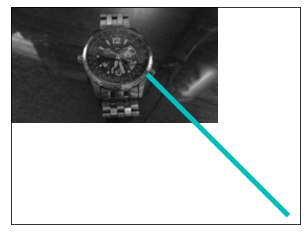

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('files/google_watch.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('files/watch.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()

Note that you can plot lines, just as you would or could with any other Matplotlib graph using the pixel locations as coordinates. Should you wish to draw on your images, however, **Matplotlib** is not required. **OpenCV** provides great methods for this. When you are done making modifications, save image like so:

In [3]:
cv2.imwrite('files/watchgray.png',img)

True

## Loading Video Source

In [5]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Jvf5y21ZqtQ?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


/usr/local/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Now let's cover some basic operations with video and webcams. Aside from the beginning lines, handling frames from a video is identical to handling for images. 

#### Using A Webcam

In [1]:
import cv2

# Windows dependencies
# - Python 2.7.6: http://www.python.org/download/
# - OpenCV: http://opencv.org/
# - Numpy -- get numpy from here because the official builds don't support x64:
#   http://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy

# Mac Dependencies
# - brew install python
# - pip install numpy
# - brew tap homebrew/science
# - brew install opencv

# Make Sure You Allow Permissions To Use Webcam To Capture Image

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)

    cv2.imshow('frame', rgb)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        out = cv2.imwrite('files/capture.jpg', frame)
        break

cap.release()
cv2.destroyAllWindows()

```cap = cv2.VideoCapture(0)```This will return video from the first webcam on your computer.

This code initiates an infinite loop (to be broken later by a break statement), where we have ret and frame being defined as the ```cap.read()```. Basically, ret is a boolean regarding whether or not there was a return at all, at the frame is each frame that is returned. If there is no frame, you wont get an error, you will get None.

Here, we define a new variable, gray, as the frame, converted to gray. Notice this says BGR2GRAY. Note: It is important to note that OpenCV reads colors as ***BGR (Blue Green Red)***, where most computer applications read as RGB (Red Green Blue).

Notice that, despite being a video stream, we still use imshow. Here, we're showing the converted-to-gray feed. If you wish to show both at the same time, you can do imshow for the original frame, and imshow for the gray and two windows will appear.

This statement just runs once per frame. Basically, if we get a key, and that key is a q, we will exit the while loop with a break, which then runs:

This releases the webcam, then closes all of the imshow() windows.

#### Turning Captured Image Into Grayscale

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('files/capture.jpg',cv2.IMREAD_GRAYSCALE)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Drawing and Writing on Image Using OpenCV 

In this OpenCV with Python tutorial, we'll be covering how to draw various shapes on your images and videos. It's fairly common to want to mark detected objects in some way, so we the humans can easily see if our programs are working as we might hope.

In [1]:
import numpy as np
import cv2

img = cv2.imread('files/capture.jpg',cv2.IMREAD_COLOR)

You can start drawing by creating a **line**.

In [ ]:
cv2.line(img,(0,0),(150,1000),(255,255,255),15)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

The ```cv2.line()``` takes the following parameters: **(where), (start coordinates, end coordinates), (color (BGR)), (line thickness)**.

Create a **rectangle**.  

In [ ]:
cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)

Create a **circle**.

In [ ]:
cv2.circle(img,(100,63), 55, (0,255,0), -1)

Writing on the image.

In [ ]:
import numpy as np
import cv2

# img = cv2.imread(files/google_watch.jpg',cv2.IMREAD_COLOR)
img = cv2.imread('files/capture.jpg',cv2.IMREAD_COLOR)

cv2.line(img,(0,0),(200,300),(255,255,255),50)
cv2.rectangle(img,(500,250),(1000,500),(0,0,255),15)
cv2.circle(img,(447,63), 63, (0,255,0), -1)

pts = np.array([[100,50],[200,300],[700,200],[500,100]], np.int32)
pts = pts.reshape((-1,1,2))

cv2.polylines(img, [pts], True, (0,255,255), 3)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(10,500), font, 6, (200,255,155), 13, cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Template Matching Using OpenCV

Template Matching is a fairly basic version of object recognition. The idea here is to find identical regions of an image that match a template we provide, giving a certain threshold. For exact object matches, with exact lighting/scale/angle, this can work great. An example where these conditions are usually met is just about any GUI on the computer. The buttons and such are always the same, so you can use template matching.

In [6]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/2CZltXv-Gpk?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


Pair template matching with some mouse controls and you've got yourself a web-based bot!

To start, you will need a main image, and a template. You should take your template from the exact "thing" you are looking for in the image. 

![template matching](files/opencv-template-matching-python-tutorial.jpg)
    
<i>Template that we will search for: **ports on the Rasberry PIs**<i>

![ports on the Rasberry PIs](files/opencv-template-for-matching.jpg)

This is just one of the ports, but we're curious to see if we can match any of the others. We do have a threshold option, where if something is maybe an 80% match, then we say it's a match. So, we will start with loading in and converting the images: 

In [1]:
import cv2
import numpy as np

img_rgb = cv2.imread('files/opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('files/opencv-template-for-matching.jpg',0)
w, h = template.shape[::-1]

Thus far, we load in both images, convert to gray. We keep the original RGB image, and create a grayscale version. I've mentioned this before, but the reason why we do this is because we do all of the processing in the grayscale version, then use the same coordinates for labels and such on the color image.

With the main image, we just have the color version and the grayscale version. We load the template and note the dimensions.

In [2]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where( res >= threshold)

Here, we call res the matchTemplate between the img_gray (our main image), the template, and then the matching method we're going to use. We specify a threshold, here 0.8 for 80%. Then we find locations with a logical statement, where the res is greater than or equal to 80%.

Finally, we mark all matches on the original image, using the coordinates we found in the gray image:

In [3]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)

So we got a few matches. Maybe lower the threshold? We'll try threshold = 0.7.

Got some false positives here. You could continue adjusting the threshold until you had 100%, but you may never get there without false positives. Another option would be to just take another template image. Sometimes, it can be useful to have multiple images of the same object. This way, you can keep your threshold high enough to be relatively certain that your results will be accurate.

## Feature Matching (Homography) Brute Force Using OpenCV

In [7]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UquTAf_9dVA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


Feature matching tutorial with OpenCV and Python. Feature matching is going to be a slightly more impressive version of template matching, where a perfect, or very close to perfect, match is required.

We start with the image that we're hoping to find, and then we can search for this image within another image. The beauty here is that the image does not need to be the same lighting, angle, rotation...etc. The features just need to match up.

To start, we need some sample images. Our "template," or image we're going to try to match:

![picture](files/opencv-feature-matching-template.jpg)

Then our image to search for this template in:

![picture](files/opencv-feature-matching-image.jpg)

Here, our template image is a bit smaller in the template than in the image we're going to search. It is also a different rotation, and has some different shadows.

Now we're going to use a form of "brute force" matching. We're going to find all features in both images. Then we match these features. We then can draw out as many as we want. Careful though. If you draw say 500 matches, you're going to have a lot of false positives. Draw the first few only.

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('files/opencv-feature-matching-template.jpg',0)
img2 = cv2.imread('files/opencv-feature-matching-image.jpg',0)

So far we've imported the modules we're going to use, and defined our two images, the template (img1) and the image we're going to search for the template in (img2).

In [10]:
orb = cv2.ORB_create()

This is the detector we're going to use for the features.

In [11]:
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

Here, we find the key points and their descriptors with the orb detector.

In [12]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

This is our BFMatcher object.

In [13]:
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

Here we create matches of the descriptors, then we sort them based on their distances.

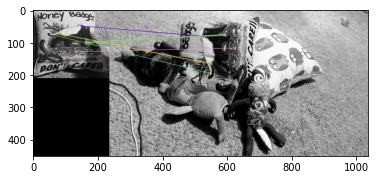

In [14]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

- - - 
<!--NAVIGATION-->
Real World Examples: [Web Scraping](../web_scraping/01_rw_web_scraping.ipynb) | [Automation](../automation/02_rw_automation.ipynb) | [Messaging](../messaging/03_rw_messaging.ipynb) | [CSV](../csv/04_rw_csv.ipynb) | [Games](../games/05_games.ipynb) | [Mobile](../mobile/06_mobile.ipynb) | [Feature Engineering](../feature_engineering/07_feature-engineering.ipynb) | **[Computer Vision](./08_computer_vision.ipynb)** | [Chatbot](../chatbot/10_chatbot.ipynb)
<br>
<br>
Optional: [Exploring Satellite Imagery in Python](./09_cv_satellite_imagery.ipynb)
<br>
[Top](#)

- - -

Copyright © 2020 Qualex Consulting Services Incorporated.